<a href="https://colab.research.google.com/github/jshankarrepo/ml-projects/blob/master/Bank_Marketing_UCI_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Marketing UCI**

## **1. Business/Real-world Problem**

### **1.1 Problem Statement**


The increasingly vast number of marketing campaigns
over time has reduced its effect on the general public.
Furthermore, economical pressures and competition has
led marketing managers to invest on directed campaigns
with a strict and rigorous selection of contacts. Such direct
campaigns can be enhanced through the use of Business
Intelligence (BI) and Data Mining (DM) techniques.


**Source**: [USING DATA MINING FOR BANK DIRECT MARKETING:
AN APPLICATION OF THE CRISP-DM METHODOLOGY](https://pdfs.semanticscholar.org/1999/417377ec21ecf7f7f55af62975065f785fb2.pdf)

### **1.2 Business Objectives**

The classification goal is to predict if the client will subscribe a term deposit (variable y).

### **1.3 Constraints**

1. Low latency
2. High Accurate Model

## **2. Machine Learning Problem**

### **2.1 Data Overview**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# copy kaggle token file from google drive to colab
!mkdir -p ~/.kaggle
!cp "/content/drive/My Drive/Colab Notebooks/kaggle/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle competitions download -c bank-marketing-uci

sample%20submission%20.csv: Skipping, found more recently modified local copy (use --force to force download)
bank-names.txt: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
bank.csv: Skipping, found more recently modified local copy (use --force to force download)


**Source** - https://www.kaggle.com/c/bank-marketing-uci


**Description**: The data is related with direct marketing campaigns of a Portuguese banking institution.  The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
 in order to access if the product (bank term deposit) would be (or not) subscribed.


**Input variables:**

   1 - **age** (numeric)

   2 - **job** : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 

   3 - **marital** : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

   4 - **education** (categorical: "unknown","secondary","primary","tertiary")

   5 - **default**: has credit in default? (binary: "yes","no")

   6 - **balance**: average yearly balance, in euros (numeric) 

   7 - **housing**: has housing loan? (binary: "yes","no")

   8 - **loan**: has personal loan? (binary: "yes","no")

   ##### **INFO**: related with the last contact of the current campaign:
   9 - **contact**: contact communication type (categorical: "unknown","telephone","cellular") 

  10 - **day**: last contact day of the month (numeric)

  11 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  12 - **duration**: last contact duration, in seconds (numeric)
   ##### **INFO**: other attributes:
  13 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  14 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

  15 - **previous**: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  **Output variable (desired target):**

  17 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

### **2.2 Mapping the real-world problem to an ML problem**

#### **2.2.1 Type of Machine Learning Problem**

#### **2.2.2 Performance Matrix**

1. Precision - Recall - F1 Score 
2. Confusion Matrix
3. Accuracy 

#### **2.2.3 Machine Learning Objective and Constraints**

**Objective**: Predict the probability value of each data-point belonging to two class

**Constraints:** Class probabilities are needed, Low latency constraints



#### **2.2.4 Train and Test Dataset**

Split the dataset randomly into two groups train and test with 80-20% rule

## **3. Exploratory Data Analysis**

In [ ]:
# texttable used to create a model result summary in tablular form
!pip install texttable

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('bank.csv', ';')
df.head()
print(df.shape)

(4521, 17)


In [ ]:
df_test = pd.read_csv('test.csv')
df_test = df_test.drop(labels= ['Id'], axis='columns')
df_test.head()
print(df_test.shape)

(427, 16)


In [ ]:
# merge train and test set 
df = df.append(df_test).reset_index(drop=True)
df.shape
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4943,26,blue-collar,single,secondary,no,82,yes,no,unknown,9,may,654,1,-1,0,unknown,NaN
4944,40,blue-collar,married,secondary,no,10,yes,no,unknown,9,may,1692,2,-1,0,unknown,NaN
4945,28,blue-collar,single,secondary,no,-197,yes,no,unknown,9,may,2016,2,-1,0,unknown,NaN
4946,33,blue-collar,divorced,primary,no,390,yes,no,unknown,9,may,665,2,-1,0,unknown,NaN
4947,45,blue-collar,married,primary,no,101,yes,no,unknown,12,may,460,5,-1,0,unknown,NaN


###**3.1 Age**

In [ ]:
print("Age: Null values: ",df['age'].isnull().sum())
print("Age: Min: {} and Max: {} values".format(df['age'].min(), df['age'].max()))

Age: Null values:  0
Age: Min: 19 and Max: 87 values


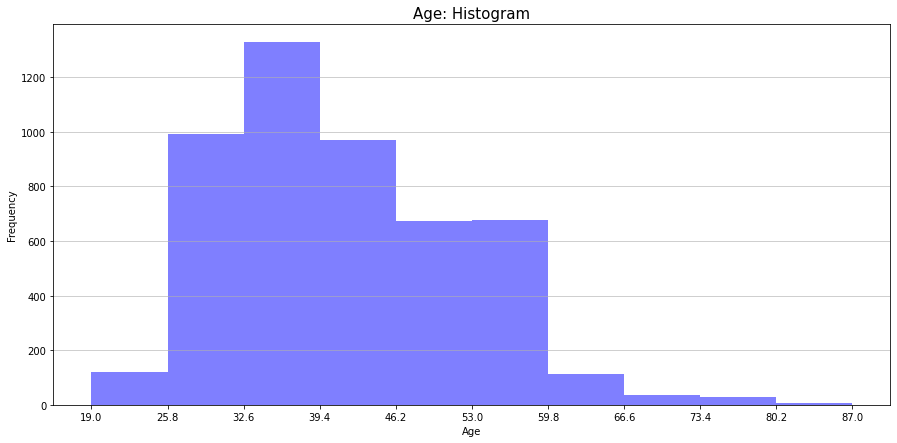

In [ ]:
plt.figure(figsize=(15, 7))
num_bins = 10
n, bins, patches = plt.hist(df.age.sort_values(), num_bins, facecolor='blue', alpha=0.5)
plt.xticks(bins)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age: Histogram',fontsize=15)
plt.show()
plt.close()

The customer mostly falls in the range of 25 to 60 age groups.

In [ ]:
df['age'] = df['age'].astype('int64')

### **3.2 Job**

In [ ]:
print("Job: Null values: ", df['job'].isnull().sum())
print("Job: Categories", df['job'].unique())

Job: Null values:  0
Job: Categories ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']


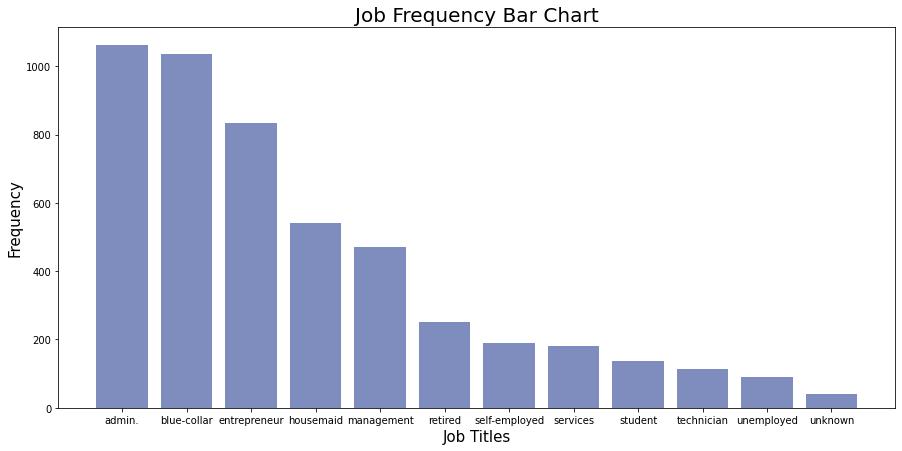

In [ ]:
plt.figure(figsize=(15, 7))
plt.bar(df['job'].sort_values().unique(),df['job'].value_counts(),align='center', alpha=0.5)
plt.xlabel("Job Titles", fontsize= 15)
plt.ylabel("Frequency", fontsize= 15)
plt.title("Job Frequency Bar Chart", fontsize = 20)
plt.show()
plt.close()

Admin, blue-collar and entrepreneur are the top 3 job sectors who a

In [ ]:
df['job'] = df['job'].astype('category')

### **3.3 Marital Status**

In [ ]:
print("Marital: Null values: ", df['marital'].isnull().sum())
print("Marital: Categories", df['marital'].unique())

Marital: Null values:  0
Marital: Categories ['married' 'single' 'divorced']


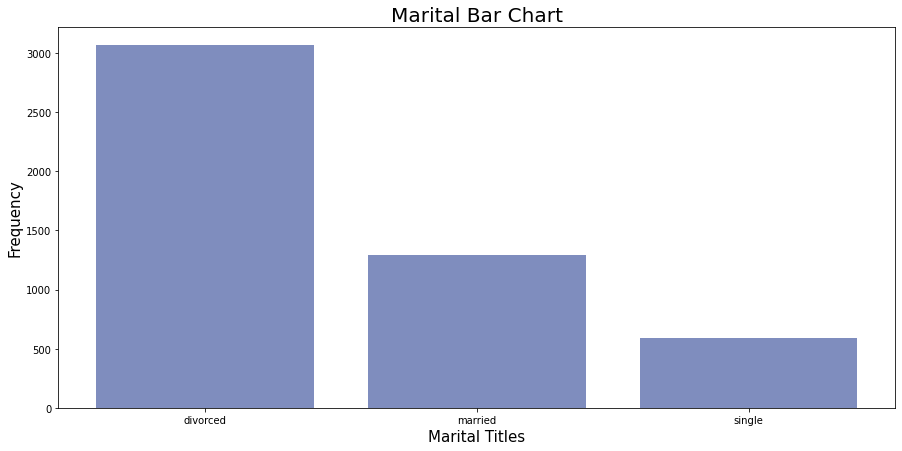

In [ ]:
plt.figure(figsize=(15, 7))
plt.bar(df['marital'].sort_values().unique(),df['marital'].value_counts(),align='center', alpha=0.5)
plt.xlabel("Marital Titles", fontsize= 15)
plt.ylabel("Frequency", fontsize= 15)
plt.title("Marital Bar Chart", fontsize = 20)
plt.show()
plt.close()

Marital has 4 categories

In [ ]:
df['marital'] = df['marital'].astype('category')

### **3.4. Education**

In [ ]:
print("Education: Null values: ", df['education'].isnull().sum())
print("Education: Categories", df['education'].unique())

# Map basic eduction `['basic.4y', 'basic.6y', 'basic.9y']` to basic to simplify eduction types
basic_edu_mapper = lambda x : 'basic' if x in ['basic.4y', 'basic.6y', 'basic.9y']   else x
df['education'] = df['education'].map(basic_edu_mapper)

print("Education: Categories", df['education'].unique())

Education: Null values:  0
Education: Categories ['primary' 'secondary' 'tertiary' 'unknown']
Education: Categories ['primary' 'secondary' 'tertiary' 'unknown']


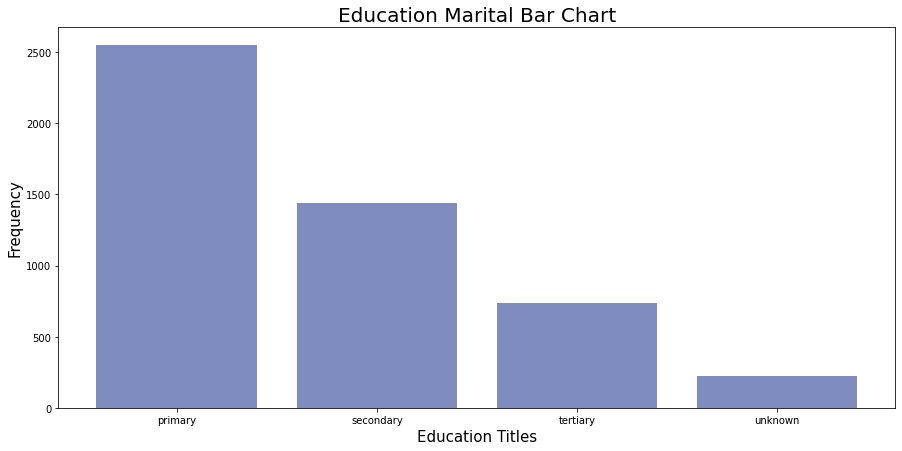

In [ ]:
plt.figure(figsize=(15, 7))
plt.bar(df['education'].sort_values().unique(),df['education'].value_counts(),align='center', alpha=0.5)
plt.xlabel("Education Titles", fontsize= 15)
plt.ylabel("Frequency", fontsize= 15)
plt.title("Education Marital Bar Chart", fontsize = 20)
plt.show()
plt.close()

Education is a Categorical Type

In [ ]:
df['education'] = df['education'].astype('category')

### **3.5. Default - has credit in default?**

In [ ]:
print("Default: Null values: ", df['default'].isnull().sum())
print("Default: Categories", df['default'].unique())

Default: Null values:  0
Default: Categories ['no' 'yes']


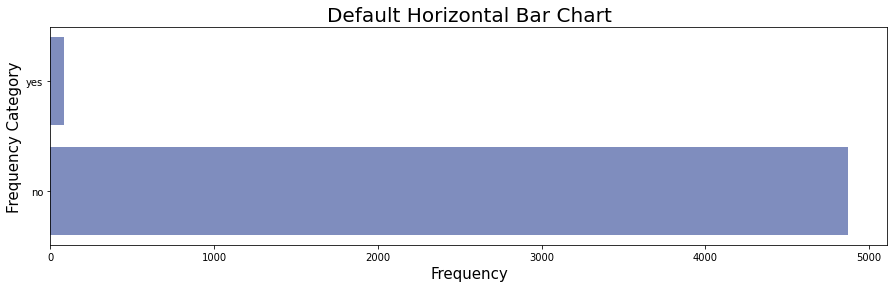

In [ ]:
plt.figure(figsize=(15, 4))
plt.barh(df['default'].sort_values().unique(),df['default'].value_counts(),align='center', alpha=0.5)
plt.xlabel("Frequency", fontsize= 15)
plt.ylabel("Frequency Category", fontsize= 15)
plt.title("Default Horizontal Bar Chart", fontsize = 20)
plt.show()
plt.close()

Default is categorical type

In [ ]:
df['default'] = df['default'].astype('bool')

### **3.6 Housing - has housing loan?**

In [ ]:
print("Housing: Null values: ", df['housing'].isnull().sum())
print("Housing: Categories", df['housing'].unique())

Housing: Null values:  0
Housing: Categories ['no' 'yes']


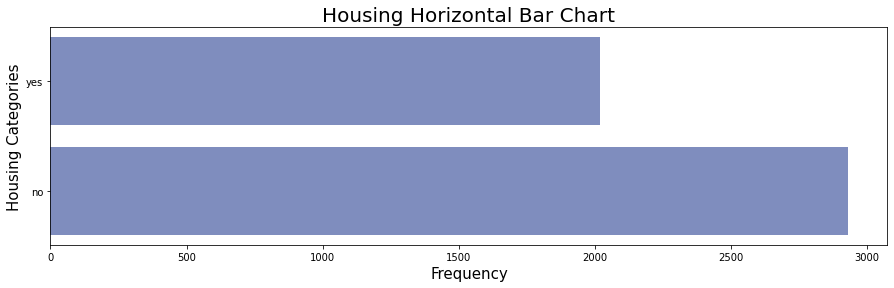

In [ ]:
plt.figure(figsize=(15, 4))
plt.barh(df['housing'].sort_values().unique(),df['housing'].value_counts(),align='center', alpha=0.5)
plt.xlabel("Frequency", fontsize= 15)
plt.ylabel("Housing Categories", fontsize= 15)
plt.title("Housing Horizontal Bar Chart", fontsize = 20)
plt.show()
plt.close()

Housing is categorical type

In [ ]:
df['housing'] = df['housing'].astype('bool')

### **3.7 Loan: has personal loan?** 

In [ ]:
print("Loan: Null values: ", df['loan'].isnull().sum())
print("Loan: Categories", df['loan'].unique())

Loan: Null values:  0
Loan: Categories ['no' 'yes']


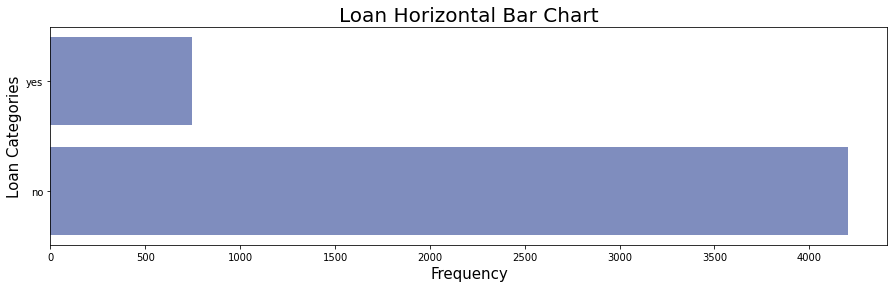

In [ ]:
plt.figure(figsize=(15, 4))
plt.barh(df['loan'].sort_values().unique(),df['loan'].value_counts(),align='center', alpha=0.5)
plt.xlabel("Frequency", fontsize= 15)
plt.ylabel("Loan Categories", fontsize= 15)
plt.title("Loan Horizontal Bar Chart", fontsize = 20)
plt.show()
plt.close()

Laon is Categorical type

In [ ]:
df['loan'] = df['loan'].astype('bool')

### **3.8 Contact: Contact Communication Type**

In [ ]:
print("Contact: Null values: ", df['contact'].isnull().sum())
print("Contact: Categories", df['contact'].unique())

Contact: Null values:  0
Contact: Categories ['cellular' 'unknown' 'telephone']


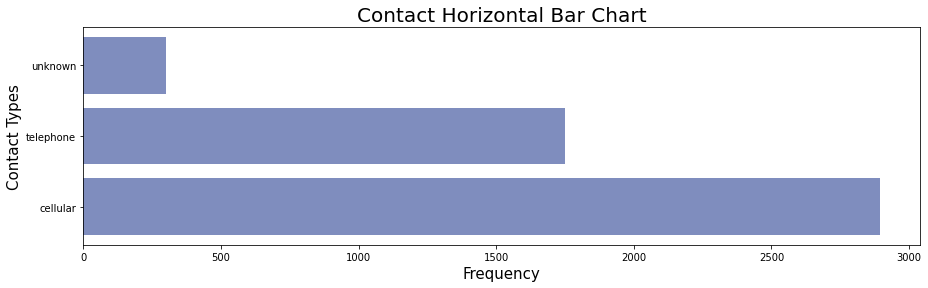

In [ ]:
plt.figure(figsize=(15, 4))
plt.barh(df['contact'].sort_values().unique(),df['contact'].value_counts(),align='center', alpha=0.5)
plt.xlabel("Frequency", fontsize= 15)
plt.ylabel("Contact Types", fontsize= 15)
plt.title("Contact Horizontal Bar Chart", fontsize = 20)
plt.show()
plt.close()

Contact is a Categorical Type

In [ ]:
df['contact'] = df['contact'].astype('category')

### **3.9 Month: last contact month of year**

In [ ]:
print("Month: Null values: ", df['month'].isnull().sum())
print("Month: Categories", df['month'].unique())

Month: Null values:  0
Month: Categories ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']


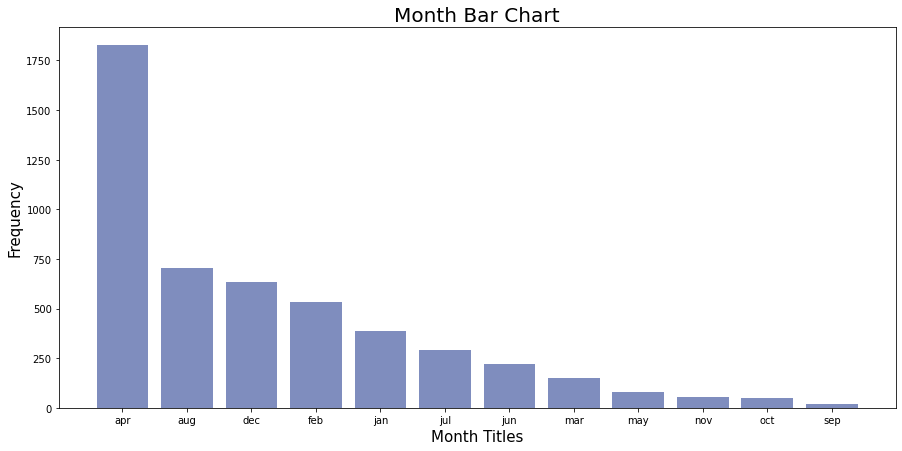

In [ ]:
plt.figure(figsize=(15, 7))
plt.bar(df['month'].sort_values().unique(),df['month'].value_counts(),align='center', alpha=0.5)
plt.xlabel("Month Titles", fontsize= 15)
plt.ylabel("Frequency", fontsize= 15)
plt.title("Month Bar Chart", fontsize = 20)
plt.show()
plt.close()

Month is a Categorical Type

In [ ]:
df['month'] = df['month'].astype('category')

###**3.10. Duration**

In [ ]:
print("Duration: Null values: ", df['duration'].isnull().sum())
print("Duration: Min: {} and Max: {} values".format(df['duration'].min(), df['duration'].max()))

Duration: Null values:  0
Duration: Min: 2 and Max: 3025 values


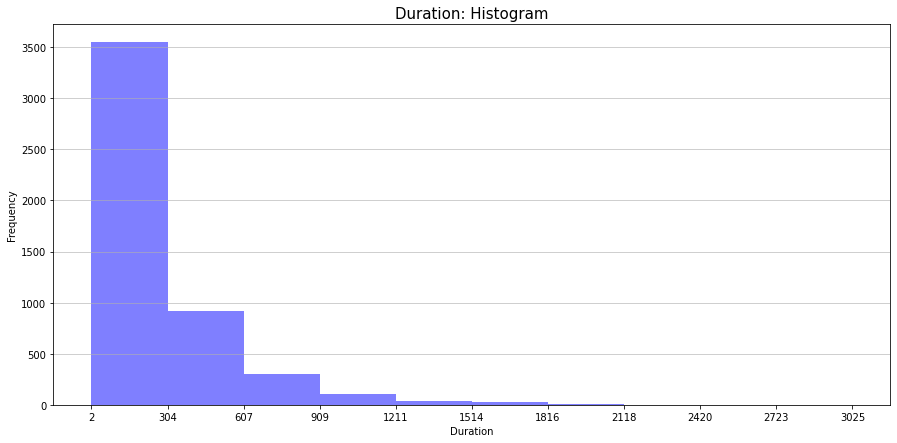

In [ ]:
plt.figure(figsize=(15, 7))
num_bins = 10
n, bins, patches = plt.hist(df.duration.sort_values(), num_bins, facecolor='blue', alpha=0.5)
plt.xticks(bins)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Duration: Histogram',fontsize=15)
plt.show()
plt.close()

Duration is a Numerical Type

In [ ]:
df['duration'] = df['duration'].astype('int64')

### **3.11. Campaign - number of contacts performed during this campaign and for this client**

In [ ]:
print("Campaign: Null values: ", df['campaign'].isnull().sum())
print("Campaign: Min: {} and Max: {} values".format(df['campaign'].min(), df['campaign'].max()))

Campaign: Null values:  0
Campaign: Min: 1 and Max: 50 values


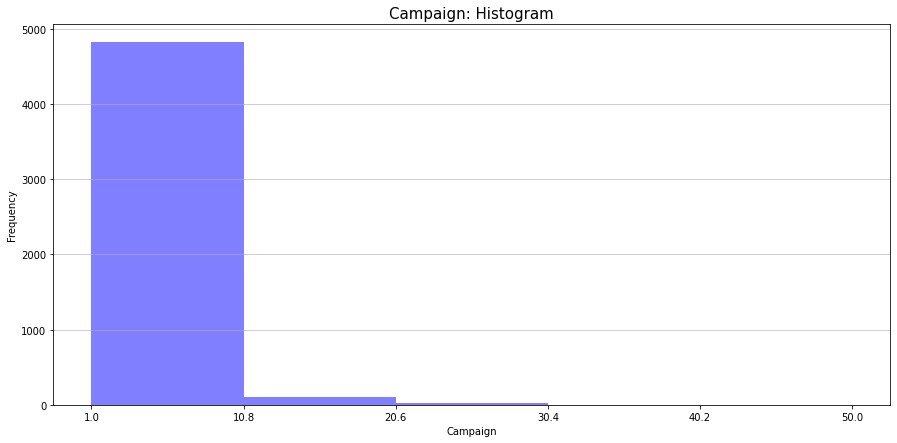

In [ ]:
plt.figure(figsize=(15, 7))
num_bins = 5
n, bins, patches = plt.hist(df.campaign.sort_values(), num_bins, facecolor='blue', alpha=0.5)
plt.xticks(bins)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Campaign')
plt.ylabel('Frequency')
plt.title('Campaign: Histogram',fontsize=15)
plt.show()
plt.close()

Campaign is a Numerical Type

In [ ]:
df['campaign'] = df['campaign'].astype('int64')

### **3.12 pdays - number of days that passed by after the client was last contacted from a previous campaign**

In [ ]:
print("Pdays: Null values: ", df['pdays'].isnull().sum())
print("Pdays: Min: {} and Max: {} values".format(df['pdays'].min(), df['pdays'].max()))

Pdays: Null values:  0
Pdays: Min: -1 and Max: 871 values


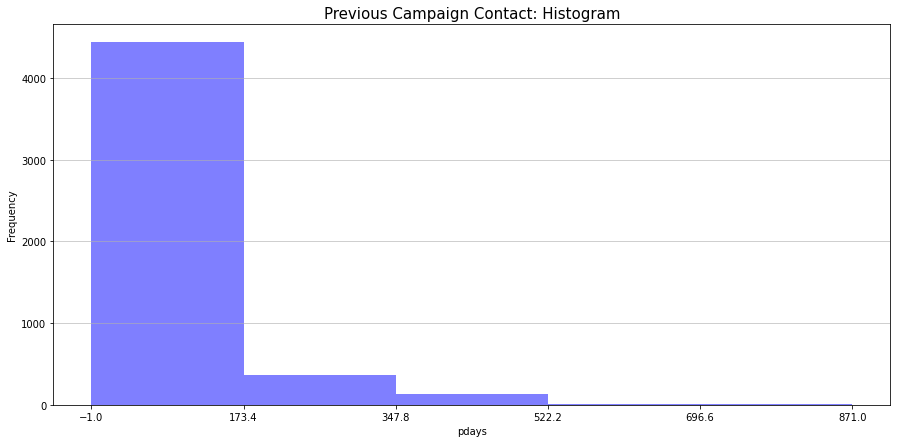

In [ ]:
plt.figure(figsize=(15, 7))
num_bins = 5
n, bins, patches = plt.hist(df.pdays.sort_values(), num_bins, facecolor='blue', alpha=0.5)
plt.xticks(bins)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('pdays')
plt.ylabel('Frequency')
plt.title('Previous Campaign Contact: Histogram',fontsize=15)
plt.show()
plt.close()

Pdays is a Numerical Type

In [ ]:
df['pdays'] = df['pdays'].astype('int64')

### **3.13 previous: number of contacts performed before this campaign and for this client**

In [ ]:
print("Previous: Null values: ", df['previous'].isnull().sum())
print("Previous: Min: {} and Max: {} values".format(df['previous'].min(), df['previous'].max()))

Previous: Null values:  0
Previous: Min: 0 and Max: 25 values


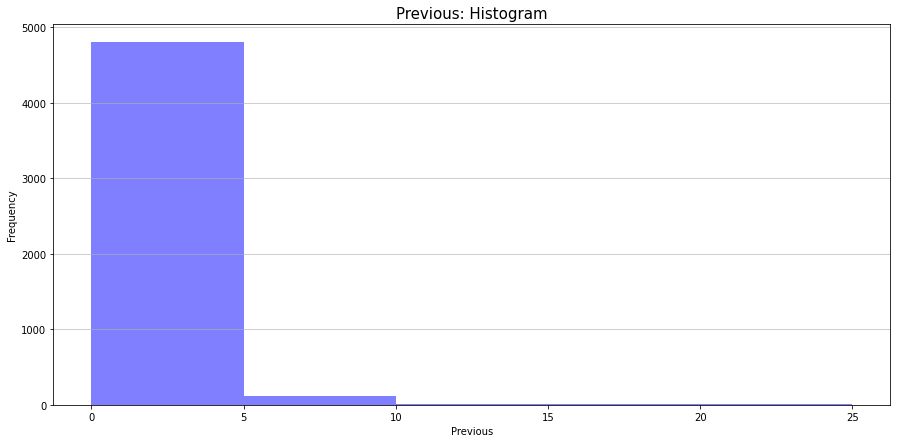

In [ ]:
plt.figure(figsize=(15, 7))
num_bins = 5
n, bins, patches = plt.hist(df.previous.sort_values(), num_bins, facecolor='blue', alpha=0.5)
plt.xticks(bins)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Previous')
plt.ylabel('Frequency')
plt.title('Previous: Histogram',fontsize=15)
plt.show()
plt.close()

Previous is a Numerical Type - most of them are 0 

In [ ]:
df['previous'] = df['previous'].astype('int64')

### **3.14 poutcome: outcome of the previous marketing campaign**

In [ ]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:
print("Poutcome: Null values: ", df['poutcome'].isnull().sum())
print("Poutcome: Categories: ", df['poutcome'].unique())

Poutcome: Null values:  0
Poutcome: Categories:  ['unknown' 'failure' 'other' 'success']


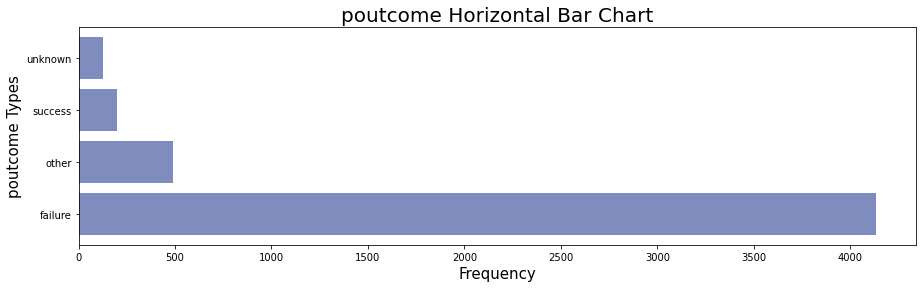

In [ ]:
plt.figure(figsize=(15, 4))
plt.barh(df['poutcome'].sort_values().unique(),df['poutcome'].value_counts(),align='center', alpha=0.5)
plt.xlabel("Frequency", fontsize= 15)
plt.ylabel("poutcome Types", fontsize= 15)
plt.title("poutcome Horizontal Bar Chart", fontsize = 20)
plt.show()
plt.close()

Poutcome is a Categorical Type

In [ ]:
df['poutcome'] = df['poutcome'].astype('category')

### **3.15 y - has the client subscribed a term deposit**

In [ ]:
# print("Target Variable: Null values: ", df['y'].isnull().sum())
# print("Target Variable: Categories: ", df['y'].unique())

In [ ]:
# plt.figure(figsize=(15, 4))
# plt.barh(df['y'].sort_values().unique(),df['y'].value_counts(),align='center', alpha=0.5)
# plt.xlabel("Frequency", fontsize= 15)
# plt.ylabel("Traget Types", fontsize= 15)
# plt.title("Traget Variable - has the client subscribed a term deposit? Horizontal Bar Chart", fontsize = 20)
# plt.show()
# plt.close()

In [ ]:
# df['y'] = df['y'].astype('bool')

**Data Visualization Summary**: 
1. Outliers: Campaign, age, duration has outlier points
2. Remove Features: 

  2.1: Pdays (Values are not distrubuted)

  2.2: previous (Most of the values are 0)

3. The target shows it is Imbalance data

**List All column datatypes**

In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4943,26,blue-collar,single,secondary,True,82,True,True,unknown,9,may,654,1,-1,0,unknown,NaN
4944,40,blue-collar,married,secondary,True,10,True,True,unknown,9,may,1692,2,-1,0,unknown,NaN
4945,28,blue-collar,single,secondary,True,-197,True,True,unknown,9,may,2016,2,-1,0,unknown,NaN
4946,33,blue-collar,divorced,primary,True,390,True,True,unknown,9,may,665,2,-1,0,unknown,NaN
4947,45,blue-collar,married,primary,True,101,True,True,unknown,12,may,460,5,-1,0,unknown,NaN


In [ ]:
# Divide in training/validation and test data
data = df[df['y'].notnull()]

In [ ]:
submission_test = df[df['y'].isnull()]
submission_test = submission_test.drop(columns= ['y'])

In [ ]:
target = data['y'].values
data = data.loc[:, data.columns != 'y']

In [ ]:
target, _ = pd.factorize(target)

## **6. Feature Engineering**

#### **6.1 Boolean Feature Engineering**

In [ ]:
def boolean_feature(data):
  # False if bank balance is less than 0
  data['isBalancePositive'] = data['balance'] < 0
  # False if duration is 0
  data['isDurationZero'] = data['duration'] == 0
  # False if the client previous contacted days are -1
  data['isClientContPrevCamp'] = data['pdays'] == -1
  return data

In [ ]:
data = boolean_feature(data)
submission_test = boolean_feature(submission_test)

### **6.2 Categorical Feature Binning**

In [ ]:
def binned_feature(data):
  # Age feature binning 
  age_cut_bins = [data['age'].min(), 30, 60, data['age'].max()]
  data['age_bins'] = pd.cut(data['age'], bins = age_cut_bins, labels=['Young', 'Mid', 'Old'])

  # Balance feature binning 
  balance_cut_bins = [data['balance'].min() - 1, data['balance'].median(), data['balance'].max() + 1]
  data['balance_bins'] = pd.cut(data['balance'], bins= balance_cut_bins, labels= ['Low','High'])

  # Duration feature binning 
  duration_cut_bins = [data['duration'].min() - 1, data['duration'].median(), data['duration'].max() + 1]
  data['duration_bins'] = pd.cut(data['duration'], bins= duration_cut_bins, labels= ['Low','High'])

  # Campaign feature binning 
  campaign_cut_bins = [data['campaign'].min() - 1, data['campaign'].median(), data['campaign'].max() + 1]
  data['campaign_bin'] = pd.cut(data['campaign'], bins= campaign_cut_bins, labels= ['Low','High'])

  # Pdays feature binning 
  pdays_cut_bins = [data['pdays'].min() - 1, data['pdays'].mean(), data['pdays'].max() + 1]
  data['pdays_bin'] = pd.cut(data['pdays'], bins= pdays_cut_bins, labels= ['Low','High'])

  return data

In [ ]:
data = binned_feature(data)
submission_test = binned_feature(submission_test)

## **5. Data Preprocessing**

In [ ]:
for bin_feature in df.columns[df.nunique() == 2].to_list():
  df[bin_feature], uniques = pd.factorize(df[bin_feature])

In [ ]:
def one_hot_encoding(data):
  # Convert boolean category featuers to numerical
  boolean_column_list = [col for col in data.select_dtypes('bool').dtypes.index.to_list()]
  for bin_feature in boolean_column_list:
    data[bin_feature], uniques = pd.factorize(data[bin_feature])

  # One hot encoding on features with more than two categories
  categorical_column_list = [col for col in data.select_dtypes('category').dtypes.index.to_list()]
  data = pd.get_dummies(data, columns=categorical_column_list, dummy_na=True)
  return data 

In [ ]:
data = one_hot_encoding(data)
submission_test = one_hot_encoding(submission_test)

## **4. Split Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(data, target, test_size = 0.20, stratify = target)
# X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.20, stratify = y_train)

In [ ]:
print("Training Samples:", X_train.shape, y_train.shape)
print('Cross Validation Sample: ', X_cv.shape, y_cv.shape)
print("Test Samples:", submission_test.shape)

Training Samples: (3616, 73) (3616,)
Cross Validation Sample:  (905, 73) (905,)
Test Samples: (427, 73)


## **7. Resampling**

Resampling technique references : https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets#t5

In [ ]:
# Training Samples
np.array(np.unique(y_train, return_counts=True)).T

array([[   0, 3199],
       [   1,  417]])

In [ ]:
count_0s = np.unique(y_train, return_counts=True)[1][0]
count_1s = np.unique(y_train, return_counts=True)[1][1]

In [ ]:
# Split Classes
X_train_0s = X_train[y_train == 0].reset_index(drop=True)
X_train_1s = X_train[y_train == 1].reset_index(drop=True)

In [ ]:
def print_sample_details(X, y):
  print('X_train Shape: {}'.format(X.shape))
  print('y_train Shape: {}'.format(y.shape))

In [ ]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    # plt.show()
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

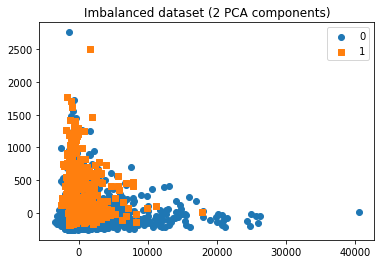

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X_train)

plot_2d_space(X, y_train, 'Imbalanced dataset (2 PCA components)')

### **7.1 Random Undersampling**

In [ ]:
# Undersample using pandas sample function
X_train_0s_rus = X_train_0s.sample(count_1s, random_state=1)

# Concat Train 0s and 1s along with the target variable 
X_train_rus = pd.concat([X_train_1s, X_train_0s_rus], axis=0)
y_train_rus = np.concatenate((y_train.take(X_train_1s.index), y_train.take(X_train_0s.sample(count_1s, random_state=1).index)), axis = 0)

In [ ]:
print_sample_details(X_train_rus, y_train_rus)

X_train Shape: (834, 73)
y_train Shape: (834,)


### **7.2 Random Oversampling**

In [ ]:
# Oversample using pandas sample function
X_train_1s_ros = X_train_1s.sample(count_0s, random_state=1, replace=True)

# Concat Train 0s and 1s along with the target variable 
X_train_ros = pd.concat([X_train_0s, X_train_1s_ros], axis=0)
y_train_ros = np.concatenate((y_train.take(X_train_0s.index), y_train.take(X_train_1s.sample(count_0s, random_state=1, replace=True).index)), axis = 0)

In [ ]:
print_sample_details(X_train_ros, y_train_ros)

X_train Shape: (6398, 73)
y_train Shape: (6398,)


### **7.3 Under-sampling: Tomek links**

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_train_tl, y_train_tl, _ = tl.fit_sample(X_train, y_train)
X_train_tl = pd.DataFrame(X_train_tl, columns=X_train.columns)

In [ ]:
print_sample_details(X_train_tl, y_train_tl)

X_train Shape: (3482, 73)
y_train Shape: (3482,)


### **7.4 Under-sampling: Cluster Centroids**

In [ ]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 10})
X_train_cc, y_train_cc = cc.fit_sample(X_train, y_train)
X_train_cc = pd.DataFrame(X_train_cc, columns=X_train.columns)

In [ ]:
print_sample_details(X_train_cc, y_train_cc)

X_train Shape: (427, 73)
y_train Shape: (427,)


### **7.5 Over-sampling: SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)
X_train_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)

In [ ]:
print_sample_details(X_train_smote, y_train_smote)

X_train Shape: (6398, 73)
y_train Shape: (6398,)


### **7.6 Over-sampling followed by under-samplin**g

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_train_smote_tomek, y_train_smote_tomek = smt.fit_sample(X_train, y_train)
X_train_smote_tomek = pd.DataFrame(X_train_smote_tomek, columns=X_train.columns)

In [ ]:
print_sample_details(X_train_smote_tomek, y_train_smote_tomek)

X_train Shape: (6162, 73)
y_train Shape: (6162,)


## **8. Model Training**

In [ ]:
# import model training related classes
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import seaborn as sns
import pprint

In [ ]:
def plot_confusion_matrix(conf_matrix):
    """
      Plots Confusion Matrix 
    """
    labels = [0, 1]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(3,2))
    sns.heatmap(conf_matrix, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()


In [ ]:
def metric_helper(test_y, predict_y):
  """
    The method will perform performance metric calculation.
    Precision, Recall, Accuracy and plot Confusion Matrix 
    Return dictionary of performance measures as key value pairs. 
  """
  
  conf_matrix = confusion_matrix(test_y, predict_y)
  plot_confusion_matrix(conf_matrix)

  # miss class pts
  miss_cls_percent = (len(test_y)-np.trace(conf_matrix))/len(test_y)*100
  print("Number of misclassified percentage: {}".format(miss_cls_percent))

  print('*'*50, 'PRECISION', '*'*50)
  precision = precision_score(test_y, predict_y)
  print('Precision Score: {}'.format(precision))

  print('*'*50, 'RECALL', '*'*50)
  recall = recall_score(test_y, predict_y)
  print('Recall Score: {}'.format(recall))

  print('*'*50, 'F1 Score', '*'*50)
  f1 = f1_score(test_y, predict_y)
  print('F1 Score: {}'.format(f1))

  print('*'*50, 'ACCURACY', '*'*50)
  accuracy = accuracy_score(test_y, predict_y)
  print('Accuracy Score: {}'.format(accuracy))


  return {'precision': precision, 'recall' : recall, 'f1_score' : f1, 'miss_class_pts' : miss_cls_percent, 'accuracy' : accuracy}

In [ ]:
def model_helper(model, parameter, cv, X_train_df, y_train_df, X_test_df, y_test_df, isReturnModelObject=False):
  """
  It will perform GridSearchCV and finds optimal paramater for each model.
  With optimal values again the same machine learning model is invoked.
  Calibration is performed on the probability valued and `metric_helper`
  class is called to return classification result
  """
  # grid search 
  grid_model = GridSearchCV(model, parameter, cv = cv, scoring = 'f1', n_jobs=-1)
  grid_model_fit = grid_model.fit(X_train_df, y_train_df)

  # print best parameters
  print('*'*50, "Grid Search CV: Best Hyperparameters", '*'*50, '\n')
  pprint.pprint(grid_model_fit.best_params_)
  print('*'*50,"**********************",'*'*50, '\n')
  
  best_model = best_ml_model_object_constructor(model, True, grid_model_fit.best_params_)
  best_model.fit(X_train_df, y_train_df)
  sig_clf = CalibratedClassifierCV(best_model, method='sigmoid')
  sig_clf.fit(X_train_df, y_train_df)

  y_test_predict = sig_clf.predict(X_test_df)

  result = metric_helper(y_test_df, y_test_predict)
  # return result report if False else trained model object 
  return sig_clf if isReturnModelObject else result

In [ ]:
# KNN - Hyperparamer tuning
def knn(isBestparam = False, param= None):
    """
    Defined KNN hyperparameters based on GridSearchCV or Best model condition
    """
    if not isBestparam: 
      knn_param = {
        'n_neighbors': [10, 50, 100],
        'algorithm' : ['auto'],
        'leaf_size' : [10, 30, 50, 100],
        'p' : [1, 2],
      }
      knn_obj = KNeighborsClassifier()
      return knn_obj, knn_param
    else:
      return KNeighborsClassifier(
          n_neighbors = param['n_neighbors'],
          algorithm = param['algorithm'],
          leaf_size = param['leaf_size'],
          p = param['p']
        )
 
def naive_bayes(isBestparam = False, param = None):
    """
    Defined Naive Bayes hyperparameters based on GridSearchCV or Best model condition
    """
    if not isBestparam:
      nb_param = {
          'alpha' : [.01,0.1,1,10,100,1000]
      }
      nb_obj = MultinomialNB()
      return nb_obj, nb_param
    else:
      return MultinomialNB(alpha=param['alpha'])
 
def logistic_reg(isBestparam = False, param = None):
    """
    Defined Logistic Regression hyperparameters based on GridSearchCV or Best model condition
    """
    if not isBestparam:
      log_reg_param = {
        'penalty' : ['l1', 'l2', 'elasticnet'],
        'C' : [0.001, 0.01, 0.1, 1]
      }
      log_reg_obj = LogisticRegression()
      return log_reg_obj, log_reg_param
    else:
      return LogisticRegression(penalty=param['penalty'], C = param['C'])

def svm(isBestparam = False, param = None):
    """
    Defined Support Vector Machine hyperparameters based on GridSearchCV or Best model condition
    """
    if not isBestparam:
      svc_param = {'C':[0.05,0.1,0.5,1.0],
          'gamma':['auto'],
          'kernel':['rbf']
      }
      svc_obj = SVC(cache_size=7000)
      return svc_obj, svc_param
    else:
      return SVC(C = param['C'], gamma = param['gamma'], kernel = param['kernel'])


def random_forest(isBestparam = False, param = None):
    # Hyperparamter tuning parameter used from the below link
    # https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
    """
    Defined Random Forest hyperparameters based on GridSearchCV or Best model condition
    """
    if not isBestparam: 
      rf_param = {
        'bootstrap': [True],
        'max_depth': [30, 50],
        'max_features': ['auto'],
        'min_samples_leaf': [1, 5, 15],
        'min_samples_split': [2, 5, 15],
        'n_estimators': [100, 200, 300, 1000]
      }
      rf_obj = RandomForestClassifier()
      return rf_obj, rf_param 
    else:
      return RandomForestClassifier(
              bootstrap = param['bootstrap'],
              max_depth= param['max_depth'],
              max_features= param['max_features'],
              min_samples_leaf= param['min_samples_leaf'],
              min_samples_split= param['min_samples_split'],
              n_estimators= param['n_estimators']
              )
 
def gboostclf(isBestparam = False, param = None):
    """
    Defined Gradient Boost Classifieer hyperparameters based on GridSearchCV or Best model condition
    """
  # Hyperparamter tuning parameter used from the below link
  # https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
    if not isBestparam: 
      gb_param = {'n_estimators':range(20,81,10)}
      gb_obj = GradientBoostingClassifier(
                  learning_rate=0.1, 
                  min_samples_split=500,
                  min_samples_leaf=50,
                  max_depth=8,
                  max_features='sqrt',
                  subsample=0.8,
                  random_state=10
              )
      return gb_obj, gb_param 
    else:
      return GradientBoostingClassifier(
                  n_estimators = param['n_estimators'],
                  learning_rate=0.1, 
                  min_samples_split=500,
                  min_samples_leaf=50,
                  max_depth=8,
                  max_features='sqrt',
                  subsample=0.8,
                  random_state=10
              )
 
def ml_model_object_constructor(argument):
    """
    This acts as a switch function to map through the respective models to 
    execute grid search using the type class object name
    """
    switcher = {
        1: knn,
        2: naive_bayes,
        3: logistic_reg,
        4: svm,
        5: random_forest,
        6: gboostclf
    }
    # Get the function from switcher dictionary
    func = switcher.get(argument, lambda: "Invalid month")
    # Execute the function
    a = 10
    return func()

def best_ml_model_object_constructor(obj, isBestparam, param):
    """
    This acts as a switch function to map through the respective models to 
    execute best model using the type class object name
    """
    obj_class_name = type(obj).__name__
    switcher = {
        'KNeighborsClassifier'      : knn,
        'MultinomialNB'             : naive_bayes,
        'LogisticRegression'        : logistic_reg,
        'SVC'                       : svm,
        'RandomForestClassifier'    : random_forest,
        'GradientBoostingClassifier': gboostclf
    }
    # Get the function from switcher dictionary
    func = switcher.get(obj_class_name, lambda: "Invalid month")
    # Execute the function
    a = 10
    return func(isBestparam, param)

In [ ]:
over_all_result = dict()
models_id_list = [1, 3, 4, 5, 6]

************************************************** Model Running: KNeighborsClassifier ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 10, 'p': 2}
************************************************** ********************** ************************************************** 

-------------------------------------------------- Confusion matrix --------------------------------------------------


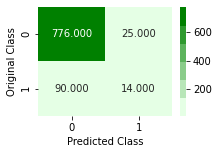

Number of misclassified percentage: 12.70718232044199
************************************************** PRECISION **************************************************
Precision Score: 0.358974358974359
************************************************** RECALL **************************************************
Recall Score: 0.1346153846153846
************************************************** F1 Score **************************************************
F1 Score: 0.19580419580419578
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8729281767955801
************************************************** Model Running: LogisticRegression ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'C': 1, 'penalty': 'l2'}
************************************************** **************

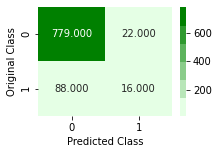

Number of misclassified percentage: 12.154696132596685
************************************************** PRECISION **************************************************
Precision Score: 0.42105263157894735
************************************************** RECALL **************************************************
Recall Score: 0.15384615384615385
************************************************** F1 Score **************************************************
F1 Score: 0.22535211267605634
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8784530386740331
************************************************** Model Running: SVC ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'C': 0.05, 'gamma': 'auto', 'kernel': 'rbf'}
************************************************** *****

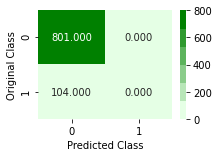

Number of misclassified percentage: 11.491712707182321
************************************************** PRECISION **************************************************
Precision Score: 0.0
************************************************** RECALL **************************************************
Recall Score: 0.0
************************************************** F1 Score **************************************************
F1 Score: 0.0
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8850828729281768
************************************************** Model Running: RandomForestClassifier ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20

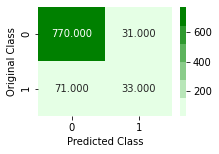

Number of misclassified percentage: 11.2707182320442
************************************************** PRECISION **************************************************
Precision Score: 0.515625
************************************************** RECALL **************************************************
Recall Score: 0.3173076923076923
************************************************** F1 Score **************************************************
F1 Score: 0.3928571428571428
************************************************** ACCURACY **************************************************
Accuracy Score: 0.887292817679558
************************************************** Model Running: GradientBoostingClassifier ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'n_estimators': 80}
************************************************** ********************** 

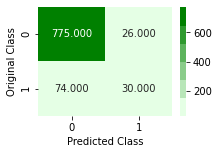

Number of misclassified percentage: 11.049723756906078
************************************************** PRECISION **************************************************
Precision Score: 0.5357142857142857
************************************************** RECALL **************************************************
Recall Score: 0.28846153846153844
************************************************** F1 Score **************************************************
F1 Score: 0.37499999999999994
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8895027624309392


In [ ]:
result = dict()
for model_id in models_id_list:
  obj, param = ml_model_object_constructor(model_id)
  print('*'*50, 'Model Running:', type(obj).__name__ , '*'*50, '\n')
  result[type(obj).__name__] = model_helper(obj, param, 5, X_train, y_train, X_cv, y_cv, isReturnModelObject=False)

# Save the result in dictonary  
over_all_result['base_model'] = result

************************************************** Model Running: KNeighborsClassifier ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 10, 'p': 1}
************************************************** ********************** ************************************************** 

-------------------------------------------------- Confusion matrix --------------------------------------------------


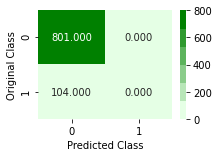

Number of misclassified percentage: 11.491712707182321
************************************************** PRECISION **************************************************
Precision Score: 0.0
************************************************** RECALL **************************************************
Recall Score: 0.0
************************************************** F1 Score **************************************************
F1 Score: 0.0
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8850828729281768
************************************************** Model Running: LogisticRegression ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'C': 0.001, 'penalty': 'l2'}
************************************************** ********************** *******************************

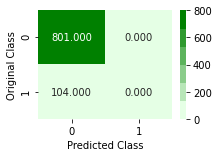

Number of misclassified percentage: 11.491712707182321
************************************************** PRECISION **************************************************
Precision Score: 0.0
************************************************** RECALL **************************************************
Recall Score: 0.0
************************************************** F1 Score **************************************************
F1 Score: 0.0
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8850828729281768
************************************************** Model Running: SVC ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'C': 0.05, 'gamma': 'auto', 'kernel': 'rbf'}
************************************************** ********************** ******************************

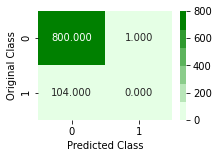

Number of misclassified percentage: 11.602209944751381
************************************************** PRECISION **************************************************
Precision Score: 0.0
************************************************** RECALL **************************************************
Recall Score: 0.0
************************************************** F1 Score **************************************************
F1 Score: 0.0
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8839779005524862
************************************************** Model Running: RandomForestClassifier ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10

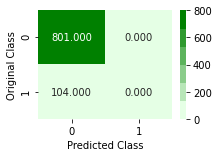

Number of misclassified percentage: 11.491712707182321
************************************************** PRECISION **************************************************
Precision Score: 0.0
************************************************** RECALL **************************************************
Recall Score: 0.0
************************************************** F1 Score **************************************************
F1 Score: 0.0
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8850828729281768
************************************************** Model Running: GradientBoostingClassifier ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'n_estimators': 20}
************************************************** ********************** ********************************

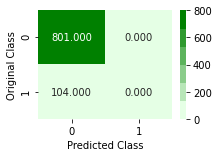

Number of misclassified percentage: 11.491712707182321
************************************************** PRECISION **************************************************
Precision Score: 0.0
************************************************** RECALL **************************************************
Recall Score: 0.0
************************************************** F1 Score **************************************************
F1 Score: 0.0
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8850828729281768


In [ ]:
result = dict()
for model_id in models_id_list:
  obj, param = ml_model_object_constructor(model_id)
  print('*'*50, 'Model Running:', type(obj).__name__ , '*'*50, '\n')
  result[type(obj).__name__] = model_helper(obj, param, 5, X_train_rus,y_train_rus, X_cv, y_cv, isReturnModelObject=False)

# Save the result in dictonary  
over_all_result['rus_model'] = result

************************************************** Model Running: KNeighborsClassifier ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 10, 'p': 2}
************************************************** ********************** ************************************************** 

-------------------------------------------------- Confusion matrix --------------------------------------------------


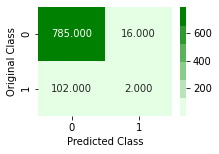

Number of misclassified percentage: 13.038674033149173
************************************************** PRECISION **************************************************
Precision Score: 0.1111111111111111
************************************************** RECALL **************************************************
Recall Score: 0.019230769230769232
************************************************** F1 Score **************************************************
F1 Score: 0.03278688524590165
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8696132596685083
************************************************** Model Running: LogisticRegression ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'C': 0.001, 'penalty': 'l2'}
************************************************** ******

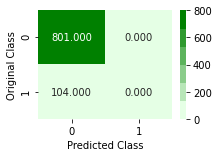

Number of misclassified percentage: 11.491712707182321
************************************************** PRECISION **************************************************
Precision Score: 0.0
************************************************** RECALL **************************************************
Recall Score: 0.0
************************************************** F1 Score **************************************************
F1 Score: 0.0
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8850828729281768
************************************************** Model Running: SVC ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}
************************************************** ********************** *******************************

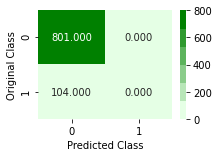

Number of misclassified percentage: 11.491712707182321
************************************************** PRECISION **************************************************
Precision Score: 0.0
************************************************** RECALL **************************************************
Recall Score: 0.0
************************************************** F1 Score **************************************************
F1 Score: 0.0
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8850828729281768
************************************************** Model Running: RandomForestClassifier ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10

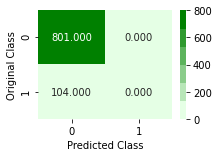

Number of misclassified percentage: 11.491712707182321
************************************************** PRECISION **************************************************
Precision Score: 0.0
************************************************** RECALL **************************************************
Recall Score: 0.0
************************************************** F1 Score **************************************************
F1 Score: 0.0
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8850828729281768
************************************************** Model Running: GradientBoostingClassifier ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'n_estimators': 80}
************************************************** ********************** ********************************

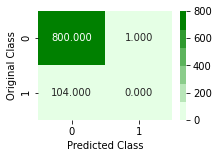

Number of misclassified percentage: 11.602209944751381
************************************************** PRECISION **************************************************
Precision Score: 0.0
************************************************** RECALL **************************************************
Recall Score: 0.0
************************************************** F1 Score **************************************************
F1 Score: 0.0
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8839779005524862


In [ ]:
result = dict()
for model_id in models_id_list:
  obj, param = ml_model_object_constructor(model_id)
  print('*'*50, 'Model Running:', type(obj).__name__ , '*'*50, '\n')
  result[type(obj).__name__] = model_helper(obj, param, 5, X_train_ros, y_train_ros, X_cv, y_cv, isReturnModelObject=False)

# Save the result in dictonary  
over_all_result['base_model'] = result

************************************************** Model Running: KNeighborsClassifier ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 10, 'p': 1}
************************************************** ********************** ************************************************** 

-------------------------------------------------- Confusion matrix --------------------------------------------------


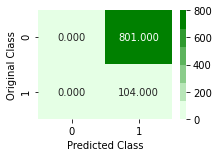

Number of misclassified percentage: 88.50828729281768
************************************************** PRECISION **************************************************
Precision Score: 0.11491712707182321
************************************************** RECALL **************************************************
Recall Score: 1.0
************************************************** F1 Score **************************************************
F1 Score: 0.20614469772051536
************************************************** ACCURACY **************************************************
Accuracy Score: 0.11491712707182321
************************************************** Model Running: LogisticRegression ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'C': 0.1, 'penalty': 'l2'}
************************************************** ********************** *

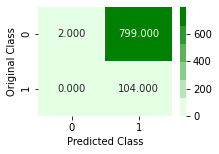

Number of misclassified percentage: 88.28729281767956
************************************************** PRECISION **************************************************
Precision Score: 0.11517165005537099
************************************************** RECALL **************************************************
Recall Score: 1.0
************************************************** F1 Score **************************************************
F1 Score: 0.20655412115193644
************************************************** ACCURACY **************************************************
Accuracy Score: 0.11712707182320442
************************************************** Model Running: SVC ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'C': 0.05, 'gamma': 'auto', 'kernel': 'rbf'}
************************************************** *********************

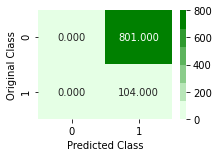

Number of misclassified percentage: 88.50828729281768
************************************************** PRECISION **************************************************
Precision Score: 0.11491712707182321
************************************************** RECALL **************************************************
Recall Score: 1.0
************************************************** F1 Score **************************************************
F1 Score: 0.20614469772051536
************************************************** ACCURACY **************************************************
Accuracy Score: 0.11491712707182321
************************************************** Model Running: RandomForestClassifier ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_sample

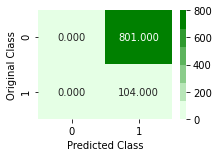

Number of misclassified percentage: 88.50828729281768
************************************************** PRECISION **************************************************
Precision Score: 0.11491712707182321
************************************************** RECALL **************************************************
Recall Score: 1.0
************************************************** F1 Score **************************************************
F1 Score: 0.20614469772051536
************************************************** ACCURACY **************************************************
Accuracy Score: 0.11491712707182321
************************************************** Model Running: GradientBoostingClassifier ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'n_estimators': 20}
************************************************** ********************** 

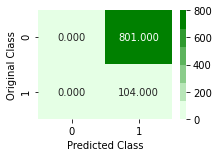

Number of misclassified percentage: 88.50828729281768
************************************************** PRECISION **************************************************
Precision Score: 0.11491712707182321
************************************************** RECALL **************************************************
Recall Score: 1.0
************************************************** F1 Score **************************************************
F1 Score: 0.20614469772051536
************************************************** ACCURACY **************************************************
Accuracy Score: 0.11491712707182321


In [ ]:
result = dict()
for model_id in models_id_list:
  obj, param = ml_model_object_constructor(model_id)
  print('*'*50, 'Model Running:', type(obj).__name__ , '*'*50, '\n')
  result[type(obj).__name__] = model_helper(obj, param, 5, X_train_cc, y_train_cc, X_cv, y_cv, isReturnModelObject=False)

# Save the result in dictonary  
over_all_result['cc_model'] = result

************************************************** Model Running: KNeighborsClassifier ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 10, 'p': 2}
************************************************** ********************** ************************************************** 

-------------------------------------------------- Confusion matrix --------------------------------------------------


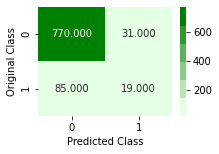

Number of misclassified percentage: 12.817679558011049
************************************************** PRECISION **************************************************
Precision Score: 0.38
************************************************** RECALL **************************************************
Recall Score: 0.18269230769230768
************************************************** F1 Score **************************************************
F1 Score: 0.24675324675324672
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8718232044198895
************************************************** Model Running: LogisticRegression ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'C': 1, 'penalty': 'l2'}
************************************************** ********************** **

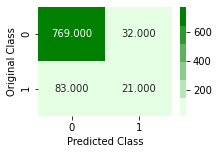

Number of misclassified percentage: 12.70718232044199
************************************************** PRECISION **************************************************
Precision Score: 0.39622641509433965
************************************************** RECALL **************************************************
Recall Score: 0.20192307692307693
************************************************** F1 Score **************************************************
F1 Score: 0.2675159235668789
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8729281767955801
************************************************** Model Running: SVC ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'C': 0.05, 'gamma': 'auto', 'kernel': 'rbf'}
************************************************** *******

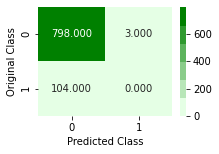

Number of misclassified percentage: 11.823204419889503
************************************************** PRECISION **************************************************
Precision Score: 0.0
************************************************** RECALL **************************************************
Recall Score: 0.0
************************************************** F1 Score **************************************************
F1 Score: 0.0
************************************************** ACCURACY **************************************************
Accuracy Score: 0.881767955801105
************************************************** Model Running: RandomForestClassifier ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200

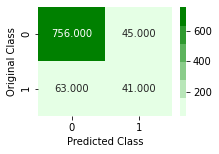

Number of misclassified percentage: 11.933701657458563
************************************************** PRECISION **************************************************
Precision Score: 0.47674418604651164
************************************************** RECALL **************************************************
Recall Score: 0.3942307692307692
************************************************** F1 Score **************************************************
F1 Score: 0.43157894736842106
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8806629834254144
************************************************** Model Running: GradientBoostingClassifier ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'n_estimators': 80}
************************************************** ********

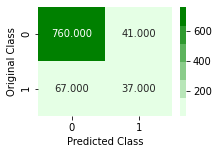

Number of misclassified percentage: 11.933701657458563
************************************************** PRECISION **************************************************
Precision Score: 0.47435897435897434
************************************************** RECALL **************************************************
Recall Score: 0.3557692307692308
************************************************** F1 Score **************************************************
F1 Score: 0.4065934065934066
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8806629834254144


In [ ]:
result = dict()
for model_id in models_id_list:
  obj, param = ml_model_object_constructor(model_id)
  print('*'*50, 'Model Running:', type(obj).__name__ , '*'*50, '\n')
  result[type(obj).__name__] = model_helper(obj, param, 5, X_train_tl, y_train_tl, X_cv, y_cv, isReturnModelObject=False)

# Save the result in dictonary  
over_all_result['tl_model'] = result

************************************************** Model Running: KNeighborsClassifier ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'algorithm': 'auto', 'leaf_size': 50, 'n_neighbors': 10, 'p': 1}
************************************************** ********************** ************************************************** 

-------------------------------------------------- Confusion matrix --------------------------------------------------


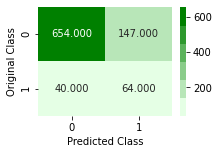

Number of misclassified percentage: 20.662983425414364
************************************************** PRECISION **************************************************
Precision Score: 0.3033175355450237
************************************************** RECALL **************************************************
Recall Score: 0.6153846153846154
************************************************** F1 Score **************************************************
F1 Score: 0.40634920634920635
************************************************** ACCURACY **************************************************
Accuracy Score: 0.7933701657458564
************************************************** Model Running: LogisticRegression ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'C': 0.01, 'penalty': 'l2'}
************************************************** *********

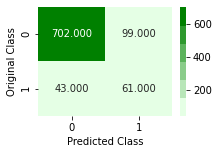

Number of misclassified percentage: 15.69060773480663
************************************************** PRECISION **************************************************
Precision Score: 0.38125
************************************************** RECALL **************************************************
Recall Score: 0.5865384615384616
************************************************** F1 Score **************************************************
F1 Score: 0.4621212121212121
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8430939226519337
************************************************** Model Running: SVC ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}
************************************************** *********************

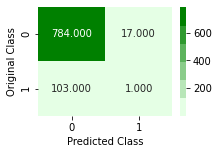

Number of misclassified percentage: 13.259668508287293
************************************************** PRECISION **************************************************
Precision Score: 0.05555555555555555
************************************************** RECALL **************************************************
Recall Score: 0.009615384615384616
************************************************** F1 Score **************************************************
F1 Score: 0.016393442622950824
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8674033149171271
************************************************** Model Running: RandomForestClassifier ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf

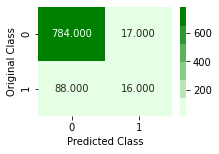

Number of misclassified percentage: 11.602209944751381
************************************************** PRECISION **************************************************
Precision Score: 0.48484848484848486
************************************************** RECALL **************************************************
Recall Score: 0.15384615384615385
************************************************** F1 Score **************************************************
F1 Score: 0.23357664233576642
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8839779005524862
************************************************** Model Running: GradientBoostingClassifier ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'n_estimators': 50}
************************************************** *******

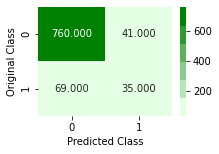

Number of misclassified percentage: 12.154696132596685
************************************************** PRECISION **************************************************
Precision Score: 0.4605263157894737
************************************************** RECALL **************************************************
Recall Score: 0.33653846153846156
************************************************** F1 Score **************************************************
F1 Score: 0.3888888888888889
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8784530386740331


In [ ]:
result = dict()
for model_id in models_id_list:
  obj, param = ml_model_object_constructor(model_id)
  print('*'*50, 'Model Running:', type(obj).__name__ , '*'*50, '\n')
  result[type(obj).__name__] = model_helper(obj, param, 5, X_train_smote, y_train_smote, X_cv, y_cv, isReturnModelObject=False)

# Save the result in dictonary  
over_all_result['smote_model'] = result

************************************************** Model Running: KNeighborsClassifier ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 10, 'p': 1}
************************************************** ********************** ************************************************** 

-------------------------------------------------- Confusion matrix --------------------------------------------------


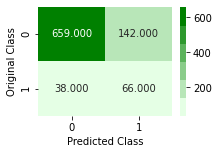

Number of misclassified percentage: 19.88950276243094
************************************************** PRECISION **************************************************
Precision Score: 0.3173076923076923
************************************************** RECALL **************************************************
Recall Score: 0.6346153846153846
************************************************** F1 Score **************************************************
F1 Score: 0.4230769230769231
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8011049723756906
************************************************** Model Running: LogisticRegression ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'C': 0.01, 'penalty': 'l2'}
************************************************** ***********

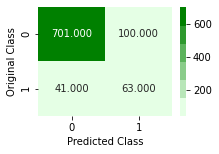

Number of misclassified percentage: 15.58011049723757
************************************************** PRECISION **************************************************
Precision Score: 0.38650306748466257
************************************************** RECALL **************************************************
Recall Score: 0.6057692307692307
************************************************** F1 Score **************************************************
F1 Score: 0.47191011235955055
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8441988950276244
************************************************** Model Running: SVC ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}
************************************************** ********

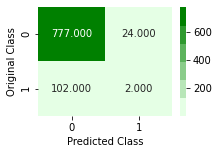

Number of misclassified percentage: 13.922651933701658
************************************************** PRECISION **************************************************
Precision Score: 0.07692307692307693
************************************************** RECALL **************************************************
Recall Score: 0.019230769230769232
************************************************** F1 Score **************************************************
F1 Score: 0.03076923076923077
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8607734806629834
************************************************** Model Running: RandomForestClassifier ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf'

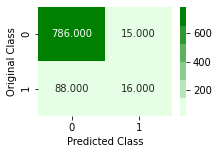

Number of misclassified percentage: 11.38121546961326
************************************************** PRECISION **************************************************
Precision Score: 0.5161290322580645
************************************************** RECALL **************************************************
Recall Score: 0.15384615384615385
************************************************** F1 Score **************************************************
F1 Score: 0.23703703703703705
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8861878453038674
************************************************** Model Running: GradientBoostingClassifier ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'n_estimators': 60}
************************************************** *********

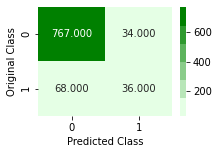

Number of misclassified percentage: 11.2707182320442
************************************************** PRECISION **************************************************
Precision Score: 0.5142857142857142
************************************************** RECALL **************************************************
Recall Score: 0.34615384615384615
************************************************** F1 Score **************************************************
F1 Score: 0.41379310344827586
************************************************** ACCURACY **************************************************
Accuracy Score: 0.887292817679558


In [ ]:
result = dict()
for model_id in models_id_list:
  obj, param = ml_model_object_constructor(model_id)
  print('*'*50, 'Model Running:', type(obj).__name__ , '*'*50, '\n')
  result[type(obj).__name__] = model_helper(obj, param, 5, X_train_smote_tomek, y_train_smote_tomek, X_cv, y_cv, isReturnModelObject=False)

# Save the result in dictonary  
over_all_result['smote_tomek_model'] = result

## **9. Summary Result**

In [ ]:
over_all_result

In [ ]:
from texttable import Texttable
column_names = ['Model', 'Precision', 'Recall','F1 Score', 'Miss Classification Percent', 'Accuracy']
for item in over_all_result.items():
  print("Models Based on Resampling Methods: {}".format(item[0]))
  t = Texttable()
  for k,v in item[1].items():
    # print(model)
    t.add_rows([column_names, [k, v.get('precision'), v.get('recall'), v.get('f1_score'), v.get('miss_class_pts'), v.get('accuracy')]]) 
  print(t.draw())

Models Based on Resampling Methods: base_model
+-----------------+-----------+--------+----------+-----------------+----------+
|      Model      | Precision | Recall | F1 Score |      Miss       | Accuracy |
|                 |           |        |          | Classification  |          |
|                 |           |        |          |     Percent     |          |
+=================+===========+========+==========+=================+==========+
| KNeighborsClass | 0.111     | 0.019  | 0.033    | 13.039          | 0.870    |
| ifier           |           |        |          |                 |          |
+-----------------+-----------+--------+----------+-----------------+----------+
| LogisticRegress | 0         | 0      | 0        | 11.492          | 0.885    |
| ion             |           |        |          |                 |          |
+-----------------+-----------+--------+----------+-----------------+----------+
| SVC             | 0         | 0      | 0        | 11.492    

************************************************** Model Running: GradientBoostingClassifier ************************************************** 

************************************************** Grid Search CV: Best Hyperparameters ************************************************** 

{'n_estimators': 50}
************************************************** ********************** ************************************************** 

-------------------------------------------------- Confusion matrix --------------------------------------------------


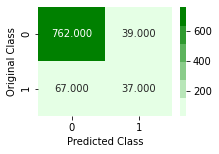

Number of misclassified percentage: 11.712707182320441
************************************************** PRECISION **************************************************
Precision Score: 0.4868421052631579
************************************************** RECALL **************************************************
Recall Score: 0.3557692307692308
************************************************** F1 Score **************************************************
F1 Score: 0.41111111111111115
************************************************** ACCURACY **************************************************
Accuracy Score: 0.8828729281767956


In [ ]:
result = dict()
models_id_list = [6]
obj, param = ml_model_object_constructor(6)
print('*'*50, 'Model Running:', type(obj).__name__ , '*'*50, '\n')
model_obj = model_helper(obj, param, 10, X_train_smote_tomek, y_train_smote_tomek, X_cv, y_cv, isReturnModelObject=True)


In [ ]:
y_test_predict = model_obj.predict(X_cv)
submission_test.drop(['id', 'y'], axis=1, inplace=True)

KeyError: ignored

In [ ]:
submission_test['y'] = model_obj.predict(submission_test)

In [ ]:
submission_test.reset_index(drop=True, inplace=True)

In [ ]:
submission_test['id'] = list(submission_test['y'].index + 1)

In [ ]:
submission_test[['id', 'y']].to_csv('submission_csv.csv', index= False)

In [ ]:
!kaggle competitions submit -c bank-marketing-uci -f submission_csv.csv -m "First Submit"